In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


In [3]:

def preprocess_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    original_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    # Enhance contrast using histogram equalization
    equalized_image = cv2.equalizeHist(blurred_image)
    
    # Detect edges using Canny edge detector
    edges = cv2.Canny(equalized_image, 100, 200)
    
    # Plot the original and processed images
    plt.figure(figsize=(10, 8))
    plt.subplot(2, 3, 1)
    plt.title('Original Image')
    plt.imshow(original_image)
    plt.subplot(2, 3, 2)
    plt.title('Grayscale Image')
    plt.imshow(gray_image, cmap='gray')
    plt.subplot(2, 3, 3)
    plt.title('Gaussian Blur')
    plt.imshow(blurred_image, cmap='gray')
    plt.subplot(2, 3, 4)
    plt.title('Histogram Equalization')
    plt.imshow(equalized_image, cmap='gray')
    plt.subplot(2, 3, 5)
    plt.title('Canny Edges')
    plt.imshow(edges, cmap='gray')
    plt.tight_layout()
    plt.show()
    
    # Convert processed image to 3-channel format
    processed_image = cv2.cvtColor(edges, cv2.COLOR_GRAY2RGB)
    return processed_image


In [4]:
import torch
import torch.nn as nn
from torchvision import transforms
from PIL import Image

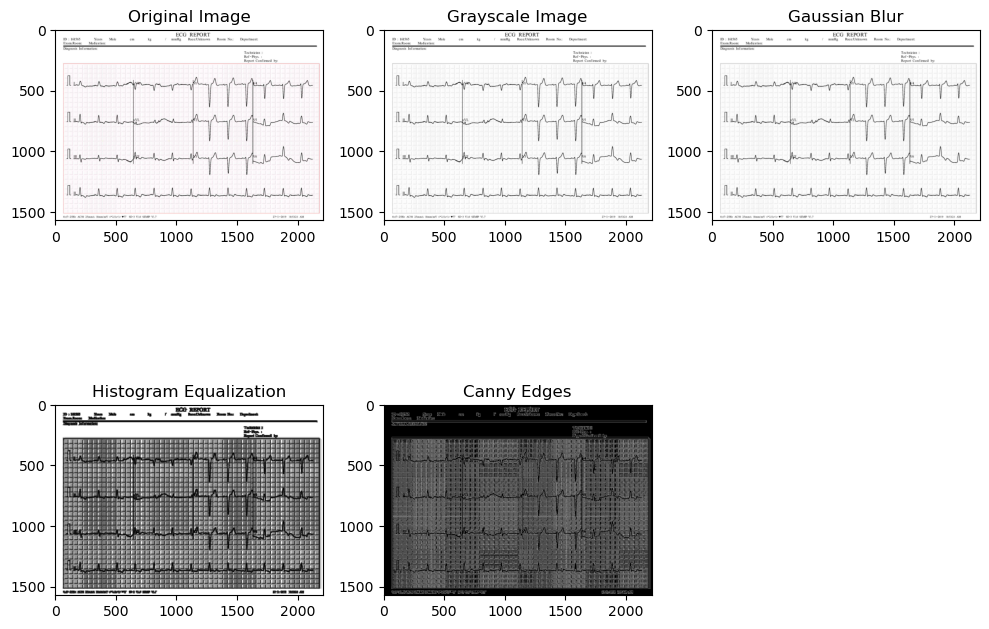

Predicted class: 2
Predicted class: Normal


In [5]:


# Define the CNN-LSTM hybrid model
class CNNLSTM(nn.Module):
    def __init__(self, num_classes=3):
        super(CNNLSTM, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Flatten()
        )
        self.lstm = nn.LSTM(64 * 28 * 28, 128, batch_first=True)
        self.fc = nn.Linear(128, num_classes)

    def forward(self, x):
        batch_size, timesteps, C, H, W = x.size()
        c_in = x.view(batch_size * timesteps, C, H, W)
        c_out = self.cnn(c_in)
        r_in = c_out.view(batch_size, timesteps, -1)
        r_out, (h_n, c_n) = self.lstm(r_in)
        out = self.fc(r_out[:, -1, :])
        return out

# Preprocessing function for the model
def prepare_image_for_model(processed_image):
    transform = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ])
    image = transform(processed_image)
    image = image.unsqueeze(0).unsqueeze(0)  # Add batch and time dimensions
    return image

# Load the model
def load_model(model_path):
    num_classes = 3
    model = CNNLSTM(num_classes)
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    model.eval()
    return model

# Make a prediction
def predict(model, image_tensor):
    with torch.no_grad():
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)
    return predicted.item()

# Example usage
model_path = 'LSTM'  # Path to the saved model
image_path = r'Normal (104).jpg'  # Path to the new ECG image

# Preprocess the image
processed_image = preprocess_image(image_path)

# Prepare the image for the model
image_tensor = prepare_image_for_model(processed_image)

# Load the model
model = load_model(model_path)

# Make a prediction
prediction = predict(model, image_tensor)
print(f'Predicted class: {prediction}')
class_names = {0: 'Abnormal', 1: 'Covid', 2: 'Normal'}
predicted_class = class_names[prediction]
print(f'Predicted class: {predicted_class}')


In [6]:
model.save('LSTM_model.h5')

AttributeError: 'CNNLSTM' object has no attribute 'save'

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Model

class CNNLSTM(Model):
    def __init__(self):  # Add your parameters here
        super(CNNLSTM, self).__init__()
        # Define your layers here

    def call(self, inputs):
        # Define the forward pass here
        return outputs

    def get_config(self):
        # Return the configuration of the model
        base_config = super(CNNLSTM, self).get_config()
        return {**base_config, "your_param1": self.your_param1, "your_param2": self.your_param2}

    @classmethod
    def from_config(cls, config):
        return cls(**config)

# Example instantiation
model = CNNLSTM(...)


TypeError: CNNLSTM.__init__() takes 1 positional argument but 2 were given